In [282]:
import requests
import time
import execjs
import pandas as pd
import json
import matplotlib.pyplot as plt

def u2b(unixT,timeformat = '%Y%m%d %H:%M:%S'):
    'default %Y%m%d %H:%M:%S,maybe you need %Y-%m-%d %H:%M:%S.%f '
    now = time.strftime(timeformat,time.localtime(unixT/1000))
    return now
def u2w(unixT):
    ltime = time.localtime(int(unixT)/1000)    
    dateymd = time.strftime("%Y-%m-%d", ltime)
    out = datetime.strptime(dateymd, "%Y-%m-%d").weekday()+1
    return out

def getUrl(fscode):
    
    head = 'http://fund.eastmoney.com/pingzhongdata/'
    tail = '.js?v='+ time.strftime("%Y%m%d%H%M%S",time.localtime())
    
    return head+fscode+tail

def getAllCode():
    
    url = 'http://fund.eastmoney.com/js/fundcode_search.js'
    content = requests.get(url)
    jsContent = execjs.compile(content.text)
    dfname = pd.DataFrame()
    n+0
    for i in jsContent.eval('r'):
        dfname[str(n)] = i
        n=n+1
    dfname = dfname.T
    dfname.columns = ['sign','SX','name','cate','SX2']
    
    return dfname



In [283]:
def read_one(fscode):
    content = requests.get(getUrl(fscode))
    if content.status_code == 404:
        return 'None'
    
    jsContent = execjs.compile(content.text)
    name = jsContent.eval('fS_name')
    code = jsContent.eval('fS_code')
    
    #单位净值走势
    netWorthTrend = jsContent.eval('Data_netWorthTrend')
    ##累计净值走势
    #ACWorthTrend = jsContent.eval('Data_ACWorthTrend')
    
    df1 = pd.DataFrame()
    for i in netWorthTrend:
        df1.loc[i['x'],'Worth'] = i['y']
    df1['name'] = fscode
    #df1['week'] = [u2w(i) for i in df1.index]
    #df1['date'] = [u2b(i) for i in df1.index]
    
    return df1

def preposs(df1):
    df1['week'] = [u2w(i) for i in df1.index]
    df1['date'] = [u2b(i) for i in df1.index]
    return df1

In [30]:
dfname = getAllCode()

In [153]:
signlist  = dfname[dfname.cate=='股票指数'].sign

In [276]:
ll = []
for i in signlist[0:100]:
    
    df1 = read_one(str(i))
    if not type(df1) == str:
        ll.append(df1)
        print(str(i))
    else:
        print(str(i)+' error')

000042
000059
000154 error
000176
000311
000312
000313
000368
000478
000512
000596
000656
000826
000827
000835
000962
000968
001015
001016
001027
001113
001149
001242
001243
001351
001397
001420
001426
001548
001549
001550
001551
001552
001553
001556
001557
001588
001589
001594
001595
001631
001632
001879
001899
002063
002076
002199
002236
002310
002311
002315
002316
002385
002510
002588
002670
002671
002906
002907
002982
003015
003016
003184
003318
003359
003366
003475
003548
003578
003579
003646
003647
003702
003760
003761
003876
003884
003885
003957
003958
003986
004190
004191
004192
004193
004194
004195
004344
004354
004408
004410
004416
004512
004513
004532
004533
004746
004788
004789
004790


In [285]:
dfall = pd.concat(ll,axis = 0)
dfall = preposs(dfall)

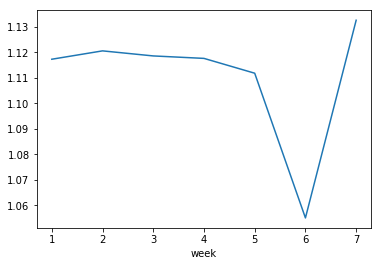

In [286]:
df2 = dfall.groupby('week')['Worth'].mean()
df2.plot()

In [287]:
df2 = dfall[((dfall.week!=7)&(dfall.week!=6))].groupby('week')['Worth'].mean()

([<matplotlib.axis.XTick at 0x25f21eed940>,
 <a list of 5 Text xticklabel objects>)

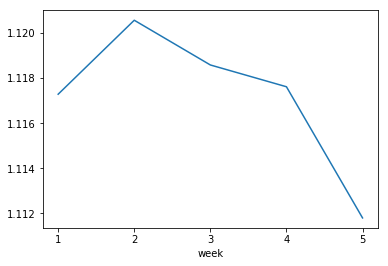

In [289]:
df2.plot()
plt.xticks([1,2,3,4,5],[1,2,3,4,5])

In [290]:
dfall

,Worth,name,week,date
1363881600000,1.0000,000042,5,20130322 00:00:00
1364486400000,1.0000,000042,5,20130329 00:00:00
1364918400000,1.0000,000042,3,20130403 00:00:00
1365696000000,1.0010,000042,5,20130412 00:00:00
1366300800000,1.0010,000042,5,20130419 00:00:00
1366560000000,1.0010,000042,1,20130422 00:00:00
1366646400000,1.0010,000042,2,20130423 00:00:00
1366732800000,1.0060,000042,3,20130424 00:00:00
1366819200000,1.0040,000042,4,20130425 00:00:00
1366905600000,1.0000,000042,5,20130426 00:00:00


In [ ]:
#根据时间，获取数值
# 根据基金代码获取净值
def getWorth(fscode):
    content = requests.get(getUrl(fscode))
    jsContent = execjs.compile(content.text)
    
    name = jsContent.eval('fS_name')
    code = jsContent.eval('fS_code')
    #单位净值走势
    netWorthTrend = jsContent.eval('Data_netWorthTrend')
    #累计净值走势
    ACWorthTrend = jsContent.eval('Data_ACWorthTrend')

    netWorth = []
    ACWorth = []

    for dayWorth in netWorthTrend[::-1]:
        netWorth.append(dayWorth['y'])

    for dayACWorth in ACWorthTrend[::-1]:
        ACWorth.append(dayACWorth[1])
    print(name,code)
    return netWorth, ACWorth

In [70]:
dfname

,sign,SX,name,cate,SX2
0,000001,HXCZHH,华夏成长混合,混合型,HUAXIACHENGZHANGHUNHE
1,000002,HXCZHH,华夏成长混合(后端),混合型,HUAXIACHENGZHANGHUNHE
2,000003,ZHKZZZQA,中海可转债债券A,债券型,ZHONGHAIKEZHUANZHAIZHAIQUANA
3,000004,ZHKZZZQC,中海可转债债券C,债券型,ZHONGHAIKEZHUANZHAIZHAIQUANC
4,000005,JSZQXYDQZQ,嘉实增强信用定期债券,定开债券,JIASHIZENGQIANGXINYONGDINGQIZHAIQUAN
5,000006,XBLDLHCZHH,西部利得量化成长混合,混合型,XIBULIDELIANGHUACHENGZHANGHUNHE
6,000008,JSZZ500ETFLJA,嘉实中证500ETF联接A,联接基金,JIASHIZHONGZHENG500ETFLIANJIEA
7,000009,YFDTTLCHBA,易方达天天理财货币A,货币型,YIFANGDATIANTIANLICAIHUOBIA
8,000010,YFDTTLCHBB,易方达天天理财货币B,货币型,YIFANGDATIANTIANLICAIHUOBIB
9,000011,HXDPJXHH,华夏大盘精选混合,混合型,HUAXIADAPANJINGXUANHUNHE


""


In [ ]:
import requests
import time
import execjs

def getUrl(fscode):
  head = 'http://fund.eastmoney.com/pingzhongdata/'
  tail = '.js?v='+ time.strftime("%Y%m%d%H%M%S",time.localtime())
  
  return head+fscode+tail

# 根据基金代码获取净值
def getWorth(fscode):
    content = requests.get(getUrl(fscode))
    jsContent = execjs.compile(content.text)
    
    name = jsContent.eval('fS_name')
    code = jsContent.eval('fS_code')
    #单位净值走势
    netWorthTrend = jsContent.eval('Data_netWorthTrend')
    #累计净值走势
    ACWorthTrend = jsContent.eval('Data_ACWorthTrend')

    netWorth = []
    ACWorth = []

    for dayWorth in netWorthTrend[::-1]:
        netWorth.append(dayWorth['y'])

    for dayACWorth in ACWorthTrend[::-1]:
        ACWorth.append(dayACWorth[1])
    print(name,code)
    return netWorth, ACWorth
  
def getAllCode():
    url = 'http://fund.eastmoney.com/js/fundcode_search.js'
    content = requests.get(url)
    jsContent = execjs.compile(content.text)
    rawData = jsContent.eval('r')
    allCode = []
    for code in rawData:
        allCode.append(code[0])
    return allCode

allCode = getAllCode()



netWorthFile = open('./netWorth.csv','w')
ACWorthFile = open('./ACWorth.csv','w')

for code in allCode:
  try:
    netWorth, ACWorth = getWorth(code)
  except:
    continue
  if len(netWorth)<=0 or len(ACWorth)<0:
    print(code+"'s' data is empty.")
    continue
  netWorthFile.write("\'"+code+"\',")  
  netWorthFile.write(",".join(list(map(str, netWorth))))
  netWorthFile.write("\n")
  
  ACWorthFile.write("\'"+code+"\',")  
  ACWorthFile.write(",".join(list(map(str, ACWorth))))
  ACWorthFile.write("\n")
  print("write "+code+"'s data success.")
  
netWorthFile.close()
ACWorthFile.close()



华夏成长混合 000001
write 000001's data success.
中海可转债债券A 000003
write 000003's data success.
中海可转债债券C 000004
write 000004's data success.
嘉实增强信用定期债券 000005
write 000005's data success.
西部利得量化成长混合 000006
write 000006's data success.
嘉实中证500ETF联接A 000008
write 000008's data success.
华夏大盘精选混合 000011
write 000011's data success.
华夏聚利债券 000014
write 000014's data success.
华夏纯债债券A 000015
write 000015's data success.
华夏纯债债券C 000016
write 000016's data success.
财通可持续混合 000017
write 000017's data success.
景顺长城品质投资混合 000020
write 000020's data success.
华夏优势增长混合 000021
write 000021's data success.
大摩双利增强债券A 000024
write 000024's data success.
大摩双利增强债券C 000025
write 000025's data success.
华富安鑫债券 000028
write 000028's data success.
富国宏观策略灵活配置混合 000029
write 000029's data success.
长城核心优选混合 000030
write 000030's data success.
华夏复兴混合 000031
write 000031's data success.
易方达信用债债券A 000032
write 000032's data success.
易方达信用债债券C 000033
write 000033's data success.
广发景宁债券 000037
write 000037's data success.
农银高增

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df1 = pd.read_csv('./netWorth.csv')
df2 = pd.read_csv('./ACWorth.csv')

c:\cx\python\python36\installthere\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (40,48,58,64,115,118,120,129,131,132,147,168,174,184,189,194,198,208,212,217,218,223,227,234,239,240,243,246,251,253,254,262,268,270,272,277,281,283,285,291,292,298,301,307,308,310,311,313,315,317,318,322,327,328,329,337,342,343,344,348,349,352,355,357,359,361,363,364,365,366,367,372,373,376,380,381,386,387,391,396,400,404,406,410,411,416,421,422,425,426,431,436,441,445,450,455,460,465,475,480,485,490,494,495,500,506,511,515,520,525,530,535,540,545,548,553,558,564,566,571,576,581,586,591,593,597,601,606,621,626,631,636,641,646,651,661,664,666,675,681,686,696,701,706,711,716,721,726,731,736,741,756,761,766,771,774,779,784,789,798,803,811,856,891,901,936,1311,1345,1393,1441,1444,1452,1492) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
time.strftime("%Y%m%d%H%M%S",time.localtime())

'20200724165417'

In [8]:
import time